# Find songs for all files of a bird (or a day of a bird)

In [1]:
#notebook for testing the search of song in a wav file
## Load everything
%matplotlib inline
import pdb
import sys
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib
import math
import scipy as sp
import socket
import os
import logging
import glob

matplotlib.style.use('ggplot')

logger = logging.getLogger()
handler = logging.StreamHandler()
formatter = logging.Formatter(
        '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.DEBUG)

# Set up Computer and paths
comp_name=socket.gethostname()
logger.info('Computer: ' + comp_name)

if 'passaro' in comp_name or 'txori' in comp_name:
    experiment_folder = os.path.join('/mnt/cube/earneodo/bci_zf/')
    raw_data_folder = os.path.join(experiment_folder, 'raw_data')
    ss_data_folder = os.path.join(experiment_folder, 'ss_data')
    
#grab soundtools
from swissknife.streamtools import findsong
from swissknife.bci.core import expstruct as et
import swissknife.streamtools.findbout as fb
from swissknife.threadtools.threadedfunction import threadedFunction

2018-01-09 18:08:55,262 root         INFO     Computer: txori


In [2]:
bird_id = 'z045'
sess_day = '2017-11-06'
rec = '06-00-01-12'
raw_location = 'rw'
raw_data_folder_bird = et.file_names(bird_id)['folders'][raw_location]

In [3]:
def list_flatten(lists):
    return [t for sublist in lists for l in sublist for t in l]

def all_bird_sessions(raw_folder):
    return list(os.walk(raw_folder))[0][1]

def all_day_wavs(day_folder):
    return glob.glob(os.path.join(day_folder, '*.wav'))

def get_day_files(raw_data_folder_bird, day):
    day_path = os.path.join(raw_data_folder_bird, day)
    logger.info('Getting all wav names for day {}'.format(day_path))
    all_wavs = all_day_wavs(day_path)
    return all_wavs

def get_bird_files(raw_data_folder_bird, only_days=None):
    if only_days:
        all_days = only_days
    else:
        all_days = all_bird_sessions(raw_data_folder_bird)
    all_bird_files = [get_day_files(raw_data_folder_bird, day) for day in all_days]
    return [x for sublist in all_bird_files for x in sublist]


In [4]:
only_days = [sess_day]
raw_file_list = get_bird_files(raw_data_folder_bird, only_days=only_days)
all_raw_file_list = [x for x in raw_file_list if 'autobouts' not in x]
all_raw_file_list.sort()

2018-01-09 18:08:59,146 root         INFO     Getting all wav names for day /mnt/cube/earneodo/bci_zf/raw_data/z045/2017-11-06


In [ ]:
raw_file_path = all_raw_file_list[-1]
raw_path, raw_fname = os.path.split(raw_file_path)
raw_path.replace('raw_data', 'ss_data')

In [ ]:
all_raw_file_list

In [ ]:
# create file handler which logs even debug messages
log_f_name = os.path.join(raw_data_folder_bird, 'search_song_that_day.log')
fh = logging.FileHandler(log_f_name)
fh.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fh.setFormatter(formatter)
# add the handlers to the logger
logger.addHandler(fh)
print(log_f_name)

### Find the bouts for all the files

In [5]:
#Parameters of the search
bit_size = 50 # ms; size of sound bits
refractory = 5 # bits; refractory period in bits
bits_bout = 2 # bits; how many bouts together is considered a bout
threshold = 20 # threshold in mads (median deviation of the median)

#The band where we expect most of the energy of zf song to be in
filt_lo = 10000 #Hz
filt_hi = 300 #Hz
found_songs = []
for raw_file_path in all_raw_file_list:
    raw_path, raw_fname = os.path.split(raw_file_path)
    ss_path = raw_path.replace('raw_data', 'ss_data')
    et.mkdir_p(ss_path)
    bout_file_path = os.path.join(ss_path, 
                                  '{}_auto.wav'.format(raw_fname.split('.')[0]))
    found = findsong.get_all_bouts(raw_file_path, bout_file_path=bout_file_path, 
                       bit_size=bit_size, refractory=refractory, bits_bout=bits_bout,
                           threshold=threshold, filt_lo=filt_lo, filt_hi=filt_hi)
    found_songs.append(found)

In [ ]:
from importlib import reload
reload(findsong)

found = findsong.get_all_bouts_dbg(raw_file_path, bout_file_path=bout_file_path, 
                       bit_size=bit_size, refractory=refractory, bits_bout=bits_bout,
                           threshold=threshold, filt_lo=filt_lo, filt_hi=filt_hi)

In [ ]:
found

### search motif


In [11]:
all_days = all_bird_sessions(raw_data_folder_bird)
all_days.sort()
len(all_days)

25

In [12]:
all_days[:]

['2017-11-02',
 '2017-11-13',
 '2017-12-18',
 '2017-12-19',
 '2017-12-20',
 '2017-12-21',
 '2017-12-22',
 '2017-12-23',
 '2017-12-24',
 '2017-12-25',
 '2017-12-26',
 '2017-12-27',
 '2017-12-28',
 '2017-12-29',
 '2017-12-30',
 '2017-12-31',
 '2018-01-01',
 '2018-01-02',
 '2018-01-03',
 '2018-01-04',
 '2018-01-05',
 '2018-01-06',
 '2018-01-07',
 '2018-01-08',
 '2018-01-09']

In [8]:
# create file handler which logs even debug messages
log_f_name = os.path.join(raw_data_folder_bird, 'search_bout_one_day_mot_1.log')
fh = logging.FileHandler(log_f_name)
fh.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fh.setFormatter(formatter)
# add the handlers to the logger
logger.addHandler(fh)
print(log_f_name)

/mnt/cube/earneodo/bci_zf/raw_data/z045/search_bout_one_day_mot_1.log


In [9]:
def search_bouts_song(bird, sess, stim_name, stim_ver='001'):
    fn = et.file_names(bird, stim_ver)
    stim_par = et.read_yml(os.path.join(fn['folders']['stim'], 'stim.par.yml'))
    
    search_par = stim_par['search_motiff']
    pattern_path = os.path.join(fn['folders']['stim'], search_par['motiff_patterns'][stim_name])
    
    fn_data = et.file_names(bird, sess)
    stream_folder = fn_data['folders']['rw']
    dest_folder = fn_data['folders']['ss']
    et.mkdir_p(dest_folder)
    
    log_f_name = os.path.join(dest_folder, 'search_bout_{}.log'.format(stim_name))
    formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

    fh = logging.FileHandler(log_f_name)
    fh.setFormatter(formatter)
    logger.addHandler(fh)
    
    all_candidates = fb.search_bouts_sess(stream_folder, pattern_path, search_par, 
                                          chunked_specgram=False)
    logger.info('Done collecting all candidates for all files in the folder')
    all_candidates = fb.collect_bouts_waveforms(all_candidates, pattern_path, border_samples=3000)
    all_candidates.to_pickle(os.path.join(dest_folder, '{}_match_cand.pickle'.format(stim_name)))
    logger.info('Saved file, nothing more to do')
    logger.removeHandler(fh)
    fh.flush()
    fh.close()
    return all_candidates

#sess_cand = search_bouts_song(bird_id, all_days[0], 'motiff_1')

In [11]:
plt.plot(all_candidates.waveform.tolist()[22][3000:-3000])

NameError: name 'all_candidates' is not defined

2018-01-10 23:27:15,819 bci.core.expstruct DEBUG    Creating directory /mnt/cube/earneodo/bci_zf/ss_data/z045/2018-01-09
2018-01-10 23:27:15,874 swissknife.streamtools.findbout INFO     will search for pattern in all waves of folder /mnt/cube/earneodo/bci_zf/raw_data/z045/2018-01-09
2018-01-10 23:27:15,881 swissknife.streamtools.findbout INFO     found 27 wav files
2018-01-10 23:27:15,883 swissknife.streamtools.findbout INFO     searching for pattern in /mnt/cube/earneodo/bci_zf/raw_data/z045/2018-01-09/06-00-01-01.wav
2018-01-10 23:27:31,546 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-10 23:27:31,555 swissknife.streamtools.findbout INFO     Calling find_the_bouts
2018-01-10 23:27:31,792 swissknife.streamtools.findbout INFO     Begin to get scores (rms, env_corr)
2018-01-10 23:27:32,059 swissknife.streamtools.findbout INFO     Getting the spectral scores
2018-01-10 23:27:32,063 swissknife.streamtools.findbout DEBUG    No chunked specgram
2018-01

2018-01-10 23:46:16,435 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-10 23:46:16,438 swissknife.streamtools.findbout INFO     Calling find_the_bouts
2018-01-10 23:46:16,635 swissknife.streamtools.findbout INFO     Begin to get scores (rms, env_corr)
2018-01-10 23:46:16,839 swissknife.streamtools.findbout INFO     Getting the spectral scores
2018-01-10 23:46:16,846 swissknife.streamtools.findbout DEBUG    No chunked specgram
2018-01-10 23:46:16,853 swissknife.streamtools.findbout INFO     Getting pattern spectrogram
2018-01-10 23:46:16,873 swissknife.streamtools.findbout INFO     Getting stream spectrogram
2018-01-10 23:47:11,771 swissknife.streamtools.findbout INFO     Getting all scores in 360741 points
2018-01-10 23:47:11,780 swissknife.streamtools.findbout INFO     done collecting scores
2018-01-10 23:50:24,564 swissknife.streamtools.findbout INFO     Getting spectrogram correlation peaks
2018-01-10 23:50:24,588 swissknife.streamtools.findbout

2018-01-11 00:09:07,864 swissknife.streamtools.findbout INFO     Finding peaks ...
2018-01-11 00:09:07,875 swissknife.streamtools.findbout INFO     0 peaks found
2018-01-11 00:09:07,882 swissknife.streamtools.findbout INFO     0 peaks left after filtering redundant
2018-01-11 00:09:07,889 swissknife.streamtools.findbout INFO     Found 0 correlation peaks
2018-01-11 00:09:07,895 swissknife.streamtools.findbout DEBUG    actual dt 0.0009977324261853937
2018-01-11 00:09:07,899 swissknife.streamtools.findbout INFO     Found 0 candidates
2018-01-11 00:09:07,907 swissknife.streamtools.findbout DEBUG    Returning clustered candidates
2018-01-11 00:09:07,917 swissknife.streamtools.findbout INFO     Returning candidates panda
2018-01-11 00:09:07,925 swissknife.streamtools.findbout INFO     searching for pattern in /mnt/cube/earneodo/bci_zf/raw_data/z045/2018-01-09/06-00-01-10.wav
2018-01-11 00:09:22,766 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-11 00:09

2018-01-11 00:28:20,039 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-11 00:28:20,052 swissknife.streamtools.findbout INFO     Calling find_the_bouts
2018-01-11 00:28:20,259 swissknife.streamtools.findbout INFO     Begin to get scores (rms, env_corr)
2018-01-11 00:28:20,442 swissknife.streamtools.findbout INFO     Getting the spectral scores
2018-01-11 00:28:20,444 swissknife.streamtools.findbout DEBUG    No chunked specgram
2018-01-11 00:28:20,464 swissknife.streamtools.findbout INFO     Getting pattern spectrogram
2018-01-11 00:28:20,479 swissknife.streamtools.findbout INFO     Getting stream spectrogram
2018-01-11 00:29:34,178 swissknife.streamtools.findbout INFO     Getting all scores in 360741 points
2018-01-11 00:29:34,200 swissknife.streamtools.findbout INFO     done collecting scores
2018-01-11 00:32:43,309 swissknife.streamtools.findbout INFO     Getting spectrogram correlation peaks
2018-01-11 00:32:43,332 swissknife.streamtools.findbout

2018-01-11 00:51:04,258 swissknife.streamtools.findbout INFO     Finding peaks ...
2018-01-11 00:51:04,264 swissknife.streamtools.findbout INFO     0 peaks found
2018-01-11 00:51:04,267 swissknife.streamtools.findbout INFO     0 peaks left after filtering redundant
2018-01-11 00:51:04,268 swissknife.streamtools.findbout INFO     Found 0 correlation peaks
2018-01-11 00:51:04,270 swissknife.streamtools.findbout DEBUG    actual dt 0.0009977324261853937
2018-01-11 00:51:04,273 swissknife.streamtools.findbout INFO     Found 0 candidates
2018-01-11 00:51:04,278 swissknife.streamtools.findbout DEBUG    Returning clustered candidates
2018-01-11 00:51:04,284 swissknife.streamtools.findbout INFO     Returning candidates panda
2018-01-11 00:51:04,291 swissknife.streamtools.findbout INFO     searching for pattern in /mnt/cube/earneodo/bci_zf/raw_data/z045/2018-01-09/06-00-01-19.wav
2018-01-11 00:51:18,697 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-11 00:51

2018-01-11 01:09:19,369 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-11 01:09:19,376 swissknife.streamtools.findbout INFO     Calling find_the_bouts
2018-01-11 01:09:19,567 swissknife.streamtools.findbout INFO     Begin to get scores (rms, env_corr)
2018-01-11 01:09:19,768 swissknife.streamtools.findbout INFO     Getting the spectral scores
2018-01-11 01:09:19,773 swissknife.streamtools.findbout DEBUG    No chunked specgram
2018-01-11 01:09:19,776 swissknife.streamtools.findbout INFO     Getting pattern spectrogram
2018-01-11 01:09:19,799 swissknife.streamtools.findbout INFO     Getting stream spectrogram
2018-01-11 01:10:21,051 swissknife.streamtools.findbout INFO     Getting all scores in 360741 points
2018-01-11 01:10:21,054 swissknife.streamtools.findbout INFO     done collecting scores
2018-01-11 01:13:27,156 swissknife.streamtools.findbout INFO     Getting spectrogram correlation peaks
2018-01-11 01:13:27,159 swissknife.streamtools.findbout

2018-01-11 01:28:27,693 swissknife.streamtools.findbout INFO     Finding peaks ...
2018-01-11 01:28:27,701 swissknife.streamtools.findbout INFO     0 peaks found
2018-01-11 01:28:27,709 swissknife.streamtools.findbout INFO     0 peaks left after filtering redundant
2018-01-11 01:28:27,715 swissknife.streamtools.findbout INFO     Found 0 correlation peaks
2018-01-11 01:28:27,717 swissknife.streamtools.findbout DEBUG    actual dt 0.0009977324262990805
2018-01-11 01:28:27,720 swissknife.streamtools.findbout INFO     Found 0 candidates
2018-01-11 01:28:27,729 swissknife.streamtools.findbout DEBUG    Returning clustered candidates
2018-01-11 01:28:27,735 swissknife.streamtools.findbout INFO     Returning candidates panda
2018-01-11 01:28:27,782 root         INFO     Done collecting all candidates for all files in the folder
2018-01-11 01:28:27,793 swissknife.streamtools.findbout INFO     Will collect the waveforms of 0 bouts
2018-01-11 01:28:27,800 swissknife.streamtools.findbout INFO     (

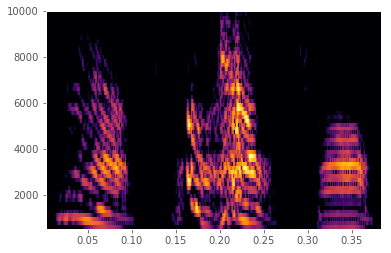

In [13]:
all_sess_cand = []
for d in all_days[-1:]:
    sess_cand = search_bouts_song(bird_id, d, 'motiff_1')
    all_sess_cand.append(sess_cand)

## run a thread with search in many sessions
- The sessions are in all_days

#### Create a log, if you may

In [ ]:
# create file handler which logs even debug messages
log_f_name = os.path.join(raw_data_folder_bird, 'search_bout_many_days.log')
fh = logging.FileHandler(log_f_name)
fh.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fh.setFormatter(formatter)
# add the handlers to the logger
logger.addHandler(fh)
print(log_f_name)

In [ ]:
[all_days[-1]]

In [ ]:
def find_bout_list(bird_id, sess_list, pattern_name):
    sess_cand_list = [search_bouts_song(bird_id, s, pattern_name) for s in sess_list]
    return pd.concatenate(sess_cand_list)

the_long_search = threadedFunction(args=(find_bout_list, bird_id, [all_days[-1]], 'motiff_1'))
the_long_search.start()


## Debugging and all that jizz

In [ ]:
import swissknife.streamtools.findbout as fb
reload(et)
reload(fb)
reload(sp)

stim_ver = '001'

fn = et.file_names(bird_id, stim_ver)

stim_par = et.read_yml(os.path.join(fn['folders']['stim'], 'stim.par.yml'))

search_par = stim_par['search_motiff']
stim_names = list(search_par['motiff_patterns'].keys())
print(stim_names)
stim_name = 'motiff_0'

search_par['corr_thresh'] = 0.5
search_par['db_cut'] = 60
pattern_path = os.path.join(fn['folders']['stim'], search_par['motiff_patterns'][stim_name])
#stream_path = all_raw_file_list[-10]
#stream_path = '/mnt/cube/earneodo/bci_zf/raw_data/z036/2017-08-06/06-00-01-23.wav'
stream_path = one_file
#stream_path = os.path.join('/mnt/cube/earneodo/bci_zf/ss_data/z036/2017-07-10', '06-00-02-11_auto.wav')
candy = fb.search_bouts(stream_path, pattern_path, search_par, chunked_specgram=False, debug=True)


In [ ]:
candy[1].plot(subplots=True)

In [ ]:
allcand = map(lambda x: fb.search_bouts(x, pattern_path, search_par, chunked_specgram=False), all_raw_file_list[0:2])

In [ ]:
pd_cand.to_pickle?

In [ ]:
pd_cand = pd.concat(allcand)

In [ ]:
stream_path = '/mnt/cube/earneodo/bci_zf/raw_data/z036/2017-08-06/06-00-01-23.wav'

In [ ]:
candy['file'] = stream_path

In [ ]:
candy

In [ ]:
pat =WavData(stream_path)
alpat = Chunk(pat).data.flatten()

In [ ]:
for start in candy.start.tolist():
    plt.figure()
    plt.plot(alpat[start:start+30000])

In [ ]:
alpat.samples

In [ ]:
list(search_par['motiff_patterns'].keys())

In [ ]:
fn